<a href="https://colab.research.google.com/github/FarzanaEva/Practice-NLP/blob/master/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import io
tfds.disable_progress_bar()

In [2]:
embedding_layer = layers.Embedding(1000, 5)

In [3]:
result= embedding_layer(tf.constant([1, 2, 3]))
result.numpy()

array([[-0.03589958, -0.00044569, -0.0053638 ,  0.03147912,  0.02896431],
       [ 0.00625909, -0.00614669,  0.02677984,  0.00309948, -0.04636767],
       [-0.04801077, -0.02919691,  0.01271522,  0.03061714,  0.04282211]],
      dtype=float32)

In [4]:
result = embedding_layer(tf.constant([[0, 1, 2], [3, 4, 5]]))
result.shape

TensorShape([2, 3, 5])

In [5]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split = (tfds.Split.TRAIN, tfds.Split.TEST), with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9R4GBM/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9R4GBM/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9R4GBM/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.



The **"_"** in the vocabulary represent spaces. Note how the vocabulary includes whole words (ending with "_") and partial words which it can use to build larger words:



In [6]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [7]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [8]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[4278, 7961,  218, ...,    0,    0,    0],
       [  62,   27,    9, ...,  372, 1963, 7975],
       [ 634,   51,    1, ...,    0,    0,    0],
       ...,
       [  62,   32,    9, ...,    0,    0,    0],
       [2589, 3171,   36, ...,    0,    0,    0],
       [  12,  548,   21, ...,    0,    0,    0]])

In [9]:
embedding_dim = 32
model = tf.keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.Conv1D(128, 5, activation="relu"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          261920    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         20608     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 315,809
Trainable params: 315,809
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=50,
    validation_data=test_batches, validation_steps=20)

Epoch 1/50
2500/2500 [==============================] - 30s 12ms/step - loss: 0.5961 - accuracy: 0.7850 - val_loss: 0.5749 - val_accuracy: 0.8750
Epoch 2/50
2500/2500 [==============================] - 21s 8ms/step - loss: 0.5527 - accuracy: 0.8932 - val_loss: 0.5607 - val_accuracy: 0.8700
Epoch 3/50
2500/2500 [==============================] - 20s 8ms/step - loss: 0.5458 - accuracy: 0.9074 - val_loss: 0.5596 - val_accuracy: 0.8950
Epoch 4/50
2500/2500 [==============================] - 19s 8ms/step - loss: 0.5410 - accuracy: 0.9188 - val_loss: 0.5670 - val_accuracy: 0.8250
Epoch 5/50
2500/2500 [==============================] - 19s 8ms/step - loss: 0.5388 - accuracy: 0.9230 - val_loss: 0.5645 - val_accuracy: 0.8650
Epoch 6/50
2500/2500 [==============================] - 19s 8ms/step - loss: 0.5362 - accuracy: 0.9294 - val_loss: 0.5756 - val_accuracy: 0.8500
Epoch 7/50
2500/2500 [==============================] - 20s 8ms/step - loss: 0.5358 - accuracy: 0.9289 - val_loss: 0.5700 - val_a

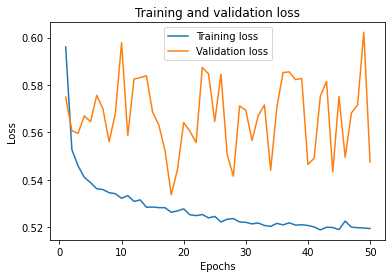

In [12]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

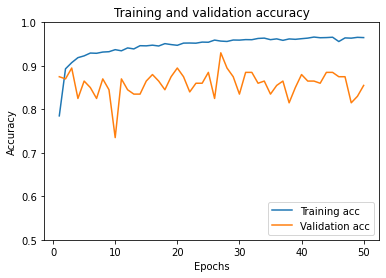

In [13]:
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [14]:
embed_layer = model.layers[0]
weights = embed_layer.get_weights()[0]
print(weights.shape)

(8185, 32)


We will now write the weights to disk. To use the Embedding Projector(https://projector.tensorflow.org/), we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).


In [16]:
encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()


In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>